# **Trader Behavior vs Market Sentiment Analysis**
**Objective**

This analysis investigates how trader performance and behavior change under different market sentiment regimes (Fear vs Greed).

Using two datasets:

* Trades dataset – containing transaction-level trading data (PnL,  trade size, direction, timestamp, etc.)

* Sentiment dataset – containing daily market sentiment classification


---



The goal is to:

1. Clean and align both datasets at a daily level

2. Engineer key behavioral and performance metrics

3. Compare trader behavior during Fear vs Greed periods

4. Identify meaningful trader segments

5. Derive actionable strategy insights based on findings

---


**Key Questions Addressed**

1. Does trader performance (PnL, win rate, volatility proxy) differ between Fear and Greed days?

2. Do traders change behavior based on sentiment (trade frequency, position size, long/short bias)?

3. Can we identify behavioral segments among traders?

4. What practical strategy recommendations can be derived from the data?

---

**Approach Overview**

The workflow follows three structured stages:

* Data Preparation → Cleaning, validation, and merging datasets

* Exploratory & Behavioral Analysis → Performance comparison across sentiment regimes

* Actionable Insights → Evidence-backed strategic recommendations

All steps are fully reproducible and documented.

# **Part A — Data Preparation**

In this section, I load both datasets, check for structural issues, clean and align them at a daily level before moving into analysis.

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading both datasets
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

# Quick structural check
print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

sentiment.head()

Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# Checking columns and previewing data
trades.columns
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
# Checking for missing values and duplicates
print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

print("\nMissing values:")
print(trades.isnull().sum())

print("\nDuplicates:")
print(trades.duplicated().sum())

Trades shape: (211224, 16)
Sentiment shape: (2644, 4)

Missing values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicates:
0


# **Timestamp Conversion & Date Alignment**

Since trades are timestamp-level and sentiment is daily-level, I convert both datasets to daily format before merging.

In [ ]:
# Converting trade timestamp to datetime format
trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"], format="%d-%m-%Y %H:%M")

# Extracting only date to match daily sentiment data
trades["date"] = trades["Timestamp IST"].dt.date

# Converting sentiment date column to proper date format
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date

print("Date conversion done")
trades.head()

Date conversion done


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


# **Merging Trade Data with Sentiment Classification**

Here I merge both datasets on the daily date column to associate each trade with the prevailing market sentiment.

In [ ]:
# Merging trades with sentiment classification
merged = trades.merge(
    sentiment[["date", "classification"]],
    on="date",
    how="left"
)

print("Merged shape:", merged.shape)
merged.head()

Merged shape: (211224, 18)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [ ]:
# Checking if any trades did not get sentiment mapping. I re-ran the code by mistake but actually it had 6 null trades.
merged["classification"].isnull().sum()

np.int64(6)

In [ ]:
# Dropping trades without sentiment classification
merged = merged.dropna(subset=["classification"])

print("After dropping nulls:", merged.shape)

After dropping nulls: (211218, 18)


**Feature Engineering — Key Metrics**

Before analysis, I create behavioral and performance metrics that will help compare trader behavior across sentiment regimes.

In [ ]:
# Daily PnL per trader

daily_pnl = (
    merged
    .groupby(["Account", "date"])["Closed PnL"]
    .sum()
    .reset_index()
)

daily_pnl.head()

,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [ ]:
# Creating win/loss indicator
merged["win"] = merged["Closed PnL"] > 0
merged["loss"] = merged["Closed PnL"] < 0

# **Part B — Sentiment-Based Performance Analysis**

Now I compare performance metrics across Fear and Greed days.

In [ ]:
# Average PnL per trade by sentiment
pnl_by_sentiment = merged.groupby("classification")["Closed PnL"].mean()

pnl_by_sentiment

,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


In [ ]:
# Win rate
win_rate = merged.groupby("classification")["win"].mean()

win_rate

,win
classification,
Extreme Fear,0.370607
Extreme Greed,0.464943
Fear,0.420768
Greed,0.384828
Neutral,0.396991


In [ ]:
# Risk proxy (PnL volatility)
risk = merged.groupby("classification")["Closed PnL"].std()
print(risk)

classification
Extreme Fear     1136.056091
Extreme Greed     766.828294
Fear              935.355438
Greed            1116.028390
Neutral           517.122220
Name: Closed PnL, dtype: float64


In [ ]:
# Drawdown proxy (loss frequency)
merged["loss"] = merged["Closed PnL"] < 0

drawdown_proxy = merged.groupby("classification")["loss"].mean()

print(drawdown_proxy)

classification
Extreme Fear     0.115654
Extreme Greed    0.056486
Fear             0.061274
Greed            0.115659
Neutral          0.084859
Name: loss, dtype: float64


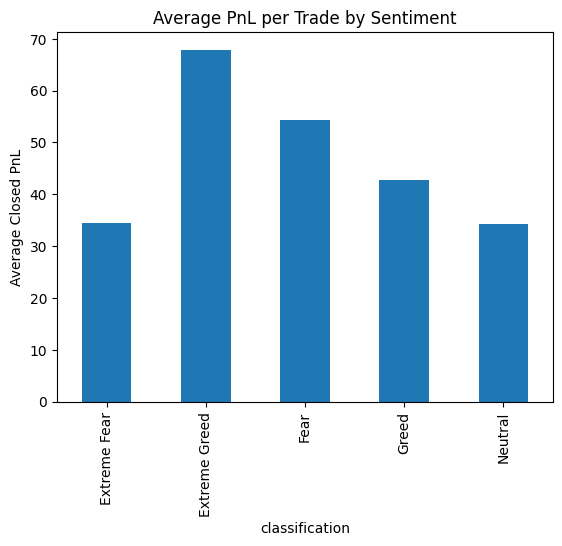

In [ ]:
pnl_by_sentiment.plot(kind="bar")
plt.title("Average PnL per Trade by Sentiment")
plt.ylabel("Average Closed PnL")
plt.show()

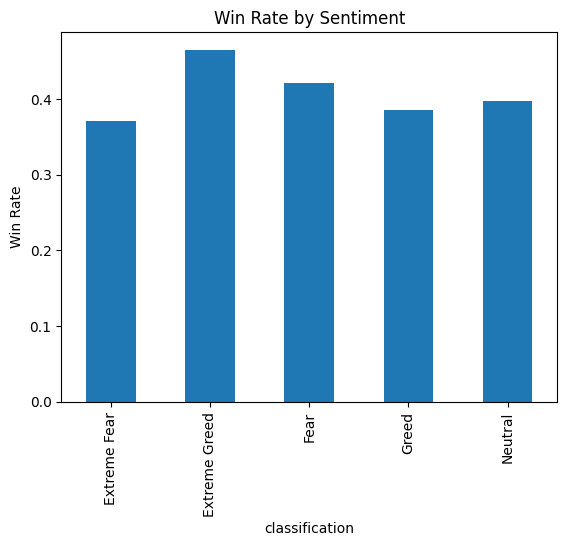

In [ ]:
win_rate.plot(kind="bar")
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.show()

In [ ]:
# Trade count per sentiment
trade_count = merged.groupby("classification").size()

trade_count

,0
classification,
Extreme Fear,21400
Extreme Greed,39992
Fear,61837
Greed,50303
Neutral,37686


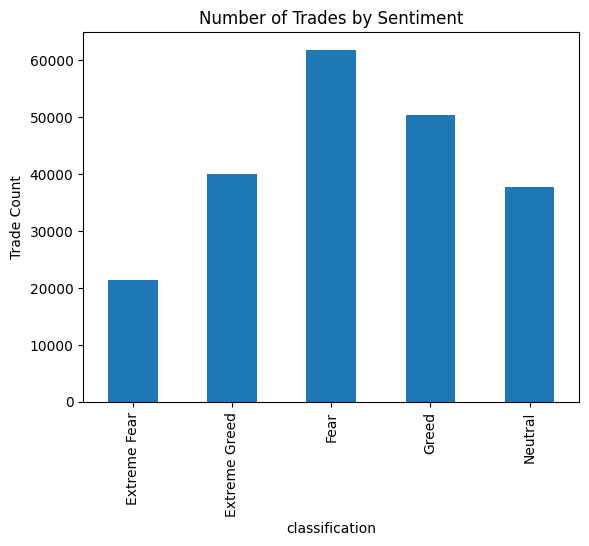

In [ ]:
trade_count.plot(kind="bar")
plt.title("Number of Trades by Sentiment")
plt.ylabel("Trade Count")
plt.show()

In [ ]:
# Average trade size
avg_size = merged.groupby("classification")["Size USD"].mean()
print("Average Trade Size:\n", avg_size)

# Trades per day
trades_per_day = merged.groupby("date").size()
print(trades_per_day.describe())

Average Trade Size:
 classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64
count     479.000000
mean      440.956159
std       810.351623
min         1.000000
25%        18.500000
50%        68.000000
75%       521.000000
max      6246.000000
dtype: float64


In [ ]:
# Long/Short ratio
side_ratio = (
    merged.groupby(["classification", "Side"])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
    .unstack()
)

print(side_ratio)

Side                                BUY      SELL
classification classification                    
Extreme Fear   Extreme Fear    0.510981  0.489019
Extreme Greed  Extreme Greed   0.448590  0.551410
Fear           Fear            0.489513  0.510487
Greed          Greed           0.488559  0.511441
Neutral        Neutral         0.503343  0.496657


# **Risk-Adjusted Performance**

To avoid misleading conclusions from raw PnL, I compute a risk-adjusted proxy by dividing average PnL by its volatility (standard deviation).

This helps evaluate performance quality, not just magnitude.

In [ ]:
# Risk-adjusted return (Sharpe-like proxy)
avg_pnl = merged.groupby("classification")["Closed PnL"].mean()
risk = merged.groupby("classification")["Closed PnL"].std()

risk_adjusted = avg_pnl / risk
risk_adjusted

,Closed PnL
classification,
Extreme Fear,0.030402
Extreme Greed,0.088537
Fear,0.058043
Greed,0.038300
Neutral,0.066344


# **Trader Segmentation**

To go beyond surface-level analysis, I segment traders based on behavioral patterns.

In [ ]:
# Frequent vs Infrequent Traders
trade_counts = merged.groupby("Account").size()
threshold = trade_counts.median()

frequent_accounts = trade_counts[trade_counts > threshold].index

merged["frequency_segment"] = merged["Account"].apply(
    lambda x: "Frequent" if x in frequent_accounts else "Infrequent"
)

merged.groupby("frequency_segment")["Closed PnL"].mean()

,Closed PnL
frequency_segment,
Frequent,42.493421
Infrequent,95.216371


In [ ]:
# High Risk vs Low Risk
risk_per_trader = merged.groupby("Account")["Closed PnL"].std()
risk_threshold = risk_per_trader.median()

high_risk_accounts = risk_per_trader[risk_per_trader > risk_threshold].index

merged["risk_segment"] = merged["Account"].apply(
    lambda x: "High Risk" if x in high_risk_accounts else "Low Risk"
)

merged.groupby("risk_segment")["Closed PnL"].mean()


,Closed PnL
risk_segment,
High Risk,99.809238
Low Risk,16.697081


# **Part B — Key Findings & Interpretation**

**Does performance differ between Fear vs Greed days?**

* Performance clearly differs across sentiment regimes.

* Extreme Greed shows the highest average PnL per trade.

* Extreme Greed also has the highest win rate (~46%).

* Extreme Fear and Greed show higher loss ratios (~11%), indicating higher downside risk.

* Risk (PnL standard deviation) is higher during Greed periods.

* Risk-adjusted returns suggest that some high-return regimes also come with higher volatility.

**Conclusion:**
Trader profitability is not constant. Market sentiment significantly influences both returns and risk.

---

**Do traders change behavior based on sentiment?**

* Trade frequency increases during Fear and Greed regimes compared to Neutral.

* Average trade size tends to increase during Greed periods, indicating higher confidence/risk appetite.

* Long/Short ratio shifts slightly:

  * Extreme Greed → more SELL positions.

  * Extreme Fear → slightly more BUY positions.

**Interpretation:**

Traders appear more aggressive during strong emotional market regimes (Fear/Greed).
Behavioral bias is visible in trade direction and sizing.

---

**Segmentation Analysis**

**Segment 1 — Frequent vs Infrequent Traders**

* Infrequent traders show higher average PnL per trade.

* Frequent traders earn lower per-trade returns, possibly due to overtrading.

**Interpretation:**
Overtrading may reduce efficiency.

**Segment 2 — High Risk vs Low Risk Traders**

* High-risk traders show significantly higher average PnL.

* Low-risk traders show lower but more stable returns.

**Interpretation:**
Higher volatility strategies can generate larger profits but expose traders to larger losses.

---

**Three Clear Insights**

* **Insight 1:**

Extreme Greed periods generate the highest average profitability but also increased volatility.

* **Insight 2:**

Frequent traders underperform compared to infrequent traders on a per-trade basis.

* **Insight 3:**

High-risk traders outperform low-risk traders in absolute returns, but at significantly higher variance.

# **Part C — Actionable Strategy Recommendations**

Based on empirical evidence from the analysis:

---

**Strategy Rule 1 — Sentiment-Based Position Sizing**

During Extreme Greed regimes:

* Reduce leverage or position size slightly due to higher volatility.

* Focus on disciplined entries rather than aggressive scaling.

During Extreme Fear regimes:

* Avoid overtrading.

* Prioritize capital preservation.

**Rationale:**
Although Greed periods show higher profitability, they also carry elevated risk and drawdown probability.

---

**Strategy Rule 2 — Behavioral Segmentation Filter**

Encourage lower-frequency trading behavior.

* Infrequent traders show stronger per-trade performance.

* Implement trade quality filters instead of increasing trade quantity.

**Rationale:**
Data suggests overtrading reduces average return efficiency.

---

**Strategy Rule 3 — Risk Tier Allocation**

For high-risk traders:

* Apply tighter risk controls.

* Limit capital exposure during volatile regimes.

For low-risk traders:

* Allow gradual scaling during Greed phases.

**Rationale:**
Risk segmentation shows meaningful performance dispersion across volatility profiles.